# “Predictive Analytics for Banking: Addressing Default Risks and Enhancing Customer Insights”

## Introduction  
This project focuses on analyzing credit card customer data to gain insights into repayment behaviors, segment customers based on risk profiles, and predict future trends. By leveraging advanced machine learning models and statistical techniques, the study addresses critical problem statements, including default risk prediction, repayment behavior analysis, customer segmentation, bill forecasting, and gender-specific risk factors. The outcomes provide actionable insights for financial institutions to enhance risk management strategies and customer engagement.


# 1. Impact of Credit Limit on Default Risk

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.807167   0.662214  0.261492  0.374932  0.691530
1        Random Forest  0.813000   0.634691  0.363979  0.462644  0.752773
2        Decision Tree  0.722500   0.379113  0.399397  0.388991  0.607552


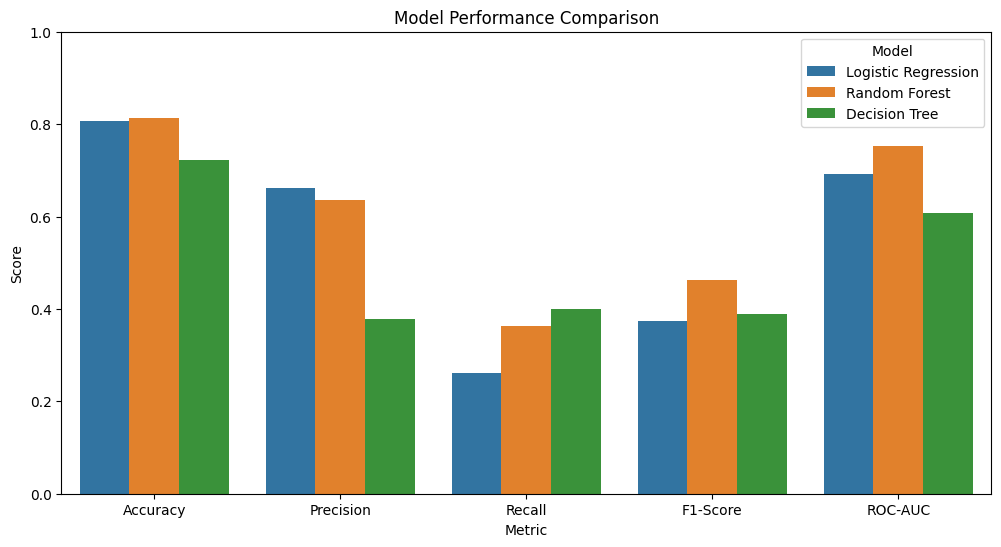

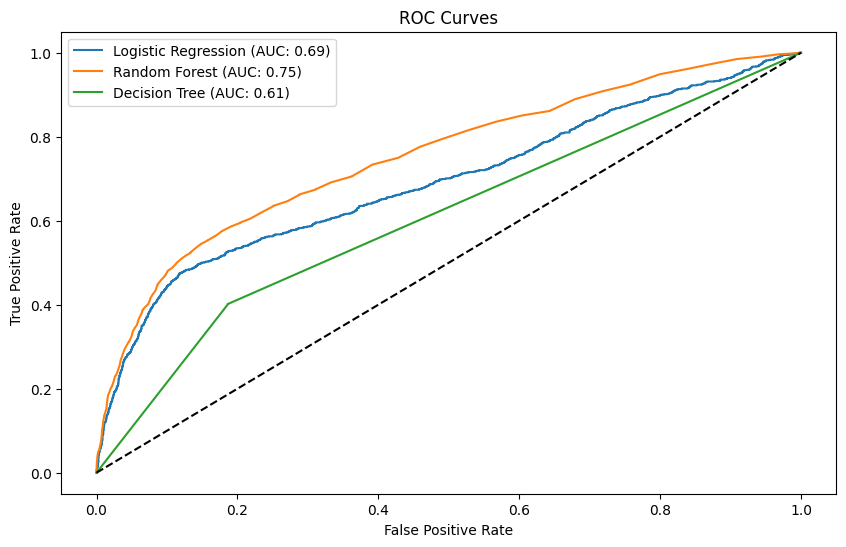

Best Model Based on F1-Score:
Model        Random Forest
Accuracy             0.813
Precision         0.634691
Recall            0.363979
F1-Score          0.462644
ROC-AUC           0.752773
Name: 1, dtype: object


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'file_path.csv' with the actual path to your dataset
data = pd.read_csv('default of credit card clients.csv')

# Feature selection and target variable
X = data[['LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 
          'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
          'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]  # Use relevant features
y = data['default payment next month']  # Target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)
y_pred_dt = decision_tree_model.predict(X_test)

# Predict probabilities for ROC-AUC
y_proba_lr = logistic_model.predict_proba(X_test)[:, 1]
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]
y_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluation function
def evaluate_model(name, y_test, y_pred, y_proba):
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    return metrics

# Evaluate all models
results = pd.DataFrame([ 
    evaluate_model("Logistic Regression", y_test, y_pred_lr, y_proba_lr),
    evaluate_model("Random Forest", y_test, y_pred_rf, y_proba_rf),
    evaluate_model("Decision Tree", y_test, y_pred_dt, y_proba_dt)
])

print(results)

# Visualization for performance metrics
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]
results_melted = results.melt(id_vars="Model", value_vars=metrics_to_plot, var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=results_melted)
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Model")
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)

plt.plot(fpr_lr, tpr_lr, label="Logistic Regression (AUC: {:.2f})".format(roc_auc_score(y_test, y_proba_lr)))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC: {:.2f})".format(roc_auc_score(y_test, y_proba_rf)))
plt.plot(fpr_dt, tpr_dt, label="Decision Tree (AUC: {:.2f})".format(roc_auc_score(y_test, y_proba_dt)))

plt.plot([0, 1], [0, 1], "k--")  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Identify the best algorithm based on F1-Score
best_model = results.loc[results['F1-Score'].idxmax()]
print("Best Model Based on F1-Score:")
print(best_model)


# 2. Repayment Behavior Analysis 

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each el

ARIMA Forecast for next 3 months: 6   -0.315784
7   -0.340253
8   -0.364510
Name: predicted_mean, dtype: float64


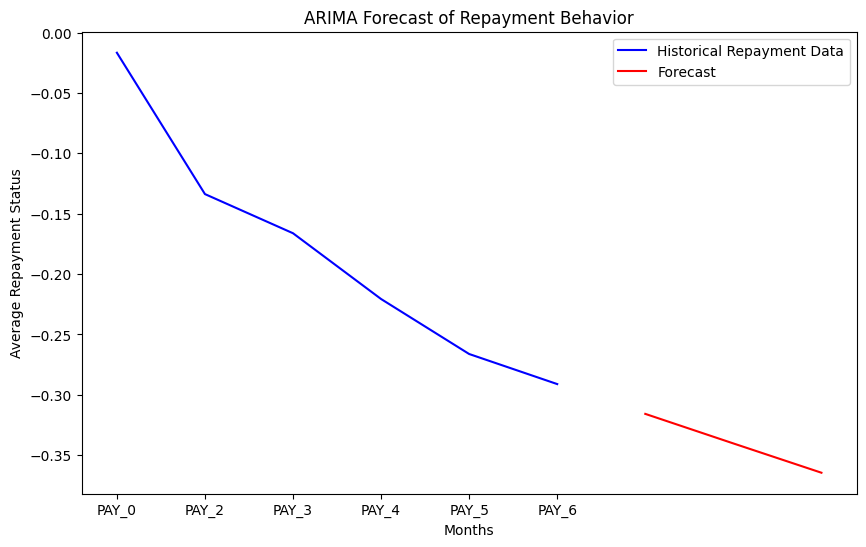

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    6
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -11.764
Date:                Wed, 15 Jan 2025   AIC                             29.529
Time:                        10:47:44   BIC                             28.357
Sample:                             0   HQIC                            26.384
                                  - 6                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9913      0.029     33.831      0.000       0.934       1.049
ma.L1      -1.451e-05      0.082     -0.000      1.000      -0.161       0.161
sigma2         0.0002   1.44e-05     10.515      0.0

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv('default of credit card clients.csv')

# Preprocess the data (fill missing values if necessary)
data.fillna(data.median(), inplace=True)

# Select repayment behavior columns (e.g., PAY_0, PAY_1, PAY_2, ..., PAY_6)
repayment_series = data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=0)

# Time Series Analysis using ARIMA

# ARIMA model for repayment behavior prediction (p=1, d=1, q=1 are example parameters, you can tune them)
arima_model = ARIMA(repayment_series, order=(1, 1, 1))  # ARIMA(p,d,q)
arima_fit = arima_model.fit()

# Forecast the next 3 months
forecast = arima_fit.forecast(steps=3)
print("ARIMA Forecast for next 3 months:", forecast)

# Visualization of ARIMA Forecast
plt.figure(figsize=(10, 6))
plt.plot(repayment_series.index, repayment_series, label='Historical Repayment Data', color='blue')
plt.plot(np.arange(len(repayment_series), len(repayment_series) + 3), forecast, label='Forecast', color='red')
plt.title("ARIMA Forecast of Repayment Behavior")
plt.xlabel("Months")
plt.ylabel("Average Repayment Status")
plt.legend()
plt.show()

# Evaluate the ARIMA model (optional)
print(arima_fit.summary())


# 3. Customer Segmentation for Credit Risk

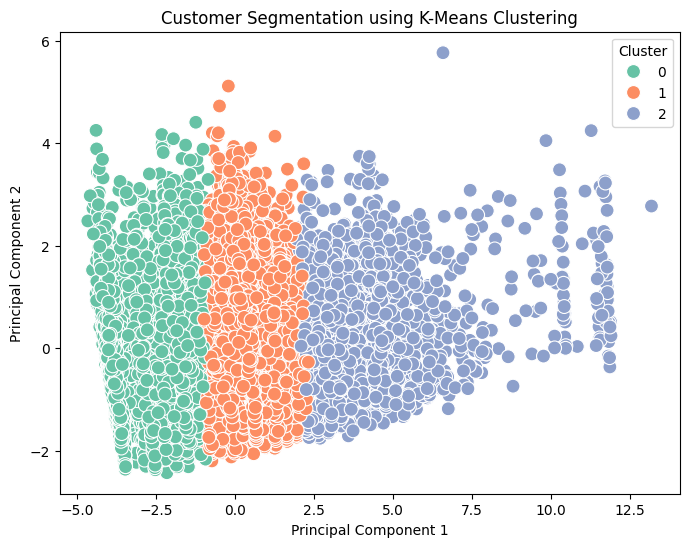

             LIMIT_BAL        AGE     PAY_0     PAY_2     PAY_3     PAY_4  \
Cluster                                                                     
0        229358.276644  36.903968 -0.854422 -1.303175 -1.396599 -1.423810   
1        152068.772484  34.874993  0.083733  0.054638  0.046180  0.000282   
2         88432.510885  34.996807  1.611030  1.890276  1.890566  1.722206   

            PAY_5     PAY_6  
Cluster                      
0       -1.404875 -1.390136  
1       -0.051142 -0.065295  
2        1.541945  1.360232  


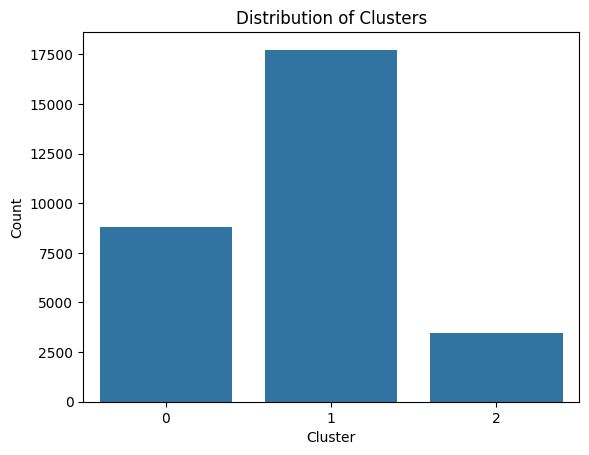

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Load dataset
data = pd.read_csv('default of credit card clients.csv')

# Preprocessing: Select relevant features for clustering
features = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters: Low Risk, Medium Risk, High Risk
data['Cluster'] = kmeans.fit_predict(X_scaled)

# PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
data['PCA1'] = pca_components[:, 0]
data['PCA2'] = pca_components[:, 1]

# Visualize the clusters using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='Set2', s=100)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Cluster Summary
cluster_summary = data.groupby('Cluster').mean()[features]
print(cluster_summary)

# Display the distribution of clusters
sns.countplot(x='Cluster', data=data)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


# 4. Predicting Monthly Bill Amounts

Mean Squared Error: 395932651.01570916
R2 Score: 0.8922867639152995


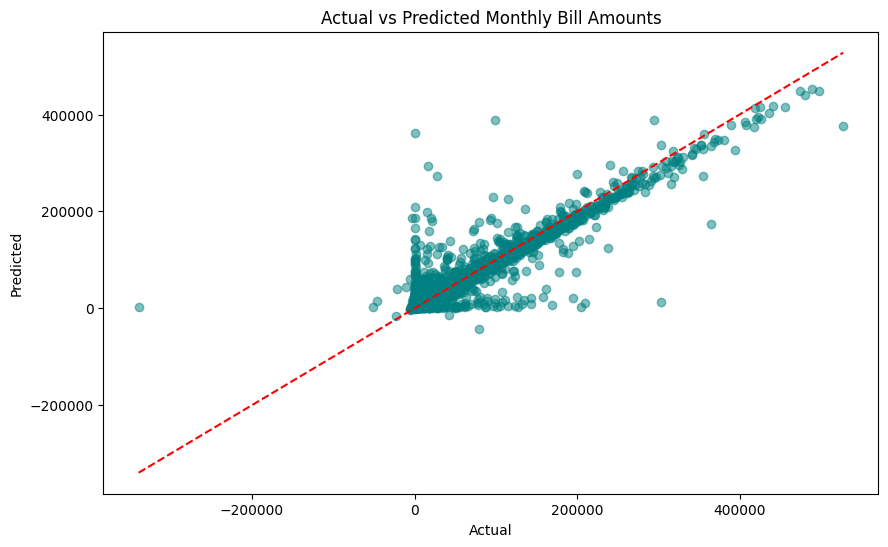

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('default of credit card clients.csv')

# Select the features for predicting future bills
features = data[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'LIMIT_BAL', 'AGE', 'SEX', 'EDUCATION']]
target = data['BILL_AMT6']  # We are forecasting BILL_AMT2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted Monthly Bill Amounts")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# 5. Gender and Default Probability

Default Rates by Gender:
SEX
Female    0.207763
Male      0.241672
Name: default payment next month, dtype: float64


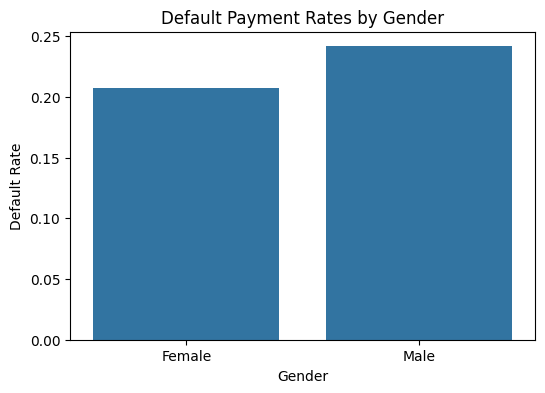

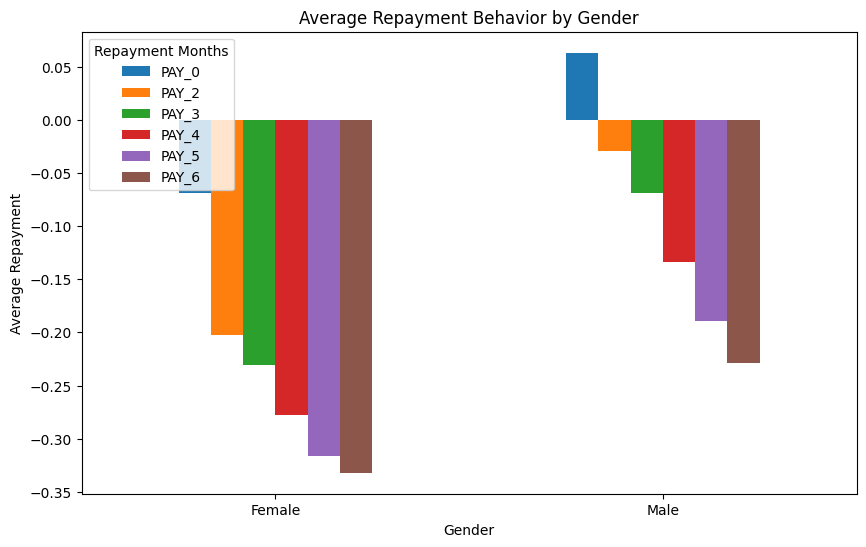

T-statistic: 6.926677006157902, P-value: 4.395248803274899e-12
There is a significant difference between default rates for males and females.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load dataset
data = pd.read_csv('default of credit card clients.csv')

# Preprocessing: Ensure necessary columns are available
data['SEX'] = data['SEX'].map({1: 'Male', 2: 'Female'})  # Mapping sex values to Male/Female

# 1. Default Rates by Gender
default_rates = data.groupby('SEX')['default payment next month'].mean()
print("Default Rates by Gender:")
print(default_rates)

# Visualize default rates by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=default_rates.index, y=default_rates.values)
plt.title('Default Payment Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Default Rate')
plt.show()

# 2. Repayment Behavior by Gender (Average of PAY_0 to PAY_6)
repayment_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
avg_repayment = data.groupby('SEX')[repayment_columns].mean()

# Visualize repayment behavior
avg_repayment.plot(kind='bar', figsize=(10, 6))
plt.title('Average Repayment Behavior by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Repayment')
plt.xticks(rotation=0)
plt.legend(title='Repayment Months', loc='upper left')
plt.show()

# 3. Statistical Test to Compare Default Rates
male_defaults = data[data['SEX'] == 'Male']['default payment next month']
female_defaults = data[data['SEX'] == 'Female']['default payment next month']

# Perform a t-test to compare default rates between genders
t_stat, p_value = stats.ttest_ind(male_defaults, female_defaults)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between default rates for males and females.")
else:
    print("There is no significant difference between default rates for males and females.")
